In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve,classification_report,accuracy_score,auc
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#For outlier treatment
from scipy.stats.mstats import winsorize
# For tuning model hyperparameters
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.feature_selection import SelectKBest,RFE,RFECV
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,LeaveOneOut,cross_val_score
from sklearn.preprocessing import Binarizer,LabelBinarizer,MinMaxScaler,OneHotEncoder,PolynomialFeatures,LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


There are 50 columns and we don't know what many of them mean! All we know from the problem statement is that we want to predict the class in the readmitted column.others we need to make a rough guess or find some insights or we should have domain knowledge about the dats.But In machine learning, this isn't actually a problem, because we let the model decide which features are important. Sometimes we may not even be given column names or told what we are predicting.It would be a good idea to have some knowledge of the columns.

In [4]:
df["readmitted"].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

While we don't need to study every column, it would be a good idea to at least understand  the target we want to predict. 
    **No re-admission**;

  **re-admission in less than 30 days** ;

  **re-admission in more than 30 days**;

## Data Types and Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

There are a number of columns with numbers that have been recorded as object datatypes. These will have to be converted to numeric datatype before we can do any numerical analysis.

In [6]:
for i in df.columns:
    df[i]=df[i].replace('?',np.nan)
pd.DataFrame(df.isnull().sum()/df.shape[0]*100).sort_values(by=0,ascending=False)

,0
weight,96.858479
medical_specialty,49.082208
payer_code,39.557416
race,2.233555
diag_3,1.398306
diag_2,0.351787
diag_1,0.020636
encounter_id,0.000000
tolazamide,0.000000
glyburide,0.000000


we should be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.

In [7]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
# Weight has almost 97% of missing data ; Payer_code and medical_speciality has around 40% & 50% of missing data. 
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)
df.shape

(101766, 47)

In [9]:
# dropping rows with NaNs.
df.dropna(inplace=True)

# Rearrange the index
df.index = range(len(df))

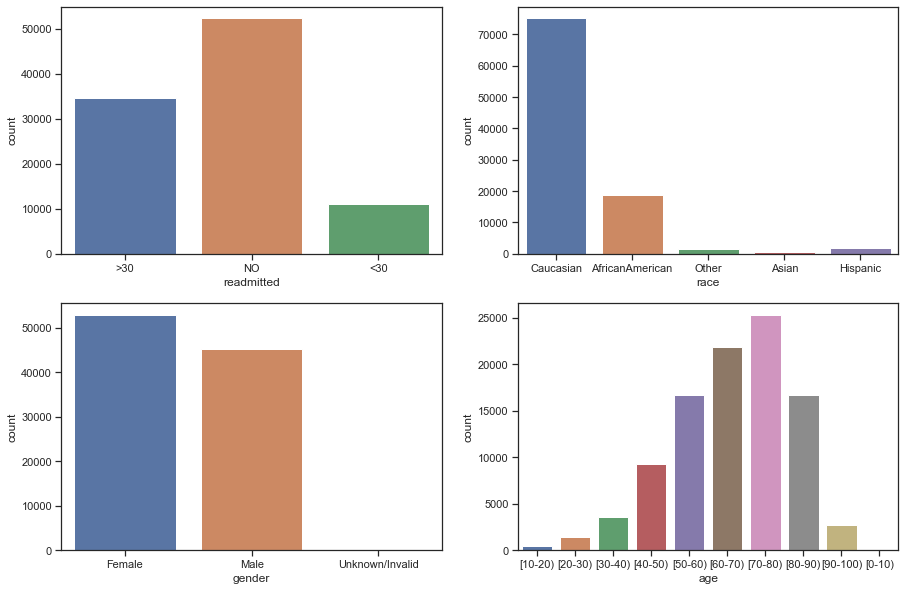

In [10]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])
plt.show()

## EDA

## Converting Data to Correct Format

We will convert the columns with numbers into numeric data types by replacing the strings which can be interpreted as floats. Then we will convert the columns that contain numeric values into numeric datatypes.     

For diag_1, diag_2 and diag_3 columns, we will replace all values containing E or V with - for transformation to a numerical type. We will also change all 250.xx values to 250.

In [11]:
# Replacement and transformation for diagnosis variables.

diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    df[col] = df[col].str.replace('E','-')
    df[col] = df[col].str.replace('V','-')
    condition = df[col].str.contains('250')
    df.loc[condition,col] = '250'
    
df[diag_cols] = df[diag_cols].astype(float)

In [12]:
df[diag_cols]

,diag_1,diag_2,diag_3
0,276.0,250.0,255.0
1,648.0,250.0,-27.0
2,8.0,250.0,403.0
3,197.0,157.0,250.0
4,414.0,411.0,250.0
...,...,...,...
98048,250.0,291.0,458.0
98049,560.0,276.0,787.0
98050,38.0,590.0,296.0
98051,996.0,285.0,998.0


Now we will group the various codes of diagnosis according to ICD-9 standard.

**Values of diagnosis:**     
     
International Classification of Diseases (ICD-9) - The International Classification of Diseases (ICD) is designed to promote international comparability in the collection, processing, classification, and presentation of mortality statistics.     
     
For codes and related diseases, please refer to the following link -    

https://www2.gov.bc.ca/gov/content/health/practitioner-professional-resources/msp/physicians/diagnostic-code-descriptions-icd-9

In [13]:
# Grouping diag_1, diag_2 and diag_3 by defining a function


def grouping(value):
    if value==250:
        return 'Diabetes'
    elif (value>=390 and value<=459) or (value==785):
        return 'Circulatory'
    elif (value>=460 and value<=519) or (value==786):
        return 'Respiratory'
    elif (value>=520 and value<=579) or (value==787):
        return 'Digestive'
    elif (value>=580 and value<=629) or value==788:
        return 'Genitourinary'
    elif (value>=630 and value<=679):
        return 'Pregnancy'
    elif (value>=710 and value<=739):
        return 'Musculoskeletal'
    elif (value>=800 and value<=999):
        return 'Injury' 
    elif (value>=1 and value<=239) or (value in [780,781,782,784]) or (value>=790 and value<=799) or ((value>=240 and value<=279) and 
                                                                                           value!=250) or (value>=680 and 
                                                                                                          value<=709):
        return 'Neoplasms'
    else:
         return "Other"

In [14]:
# Grouping
for col in diag_cols:
    df[col] = df[col].apply(grouping)

Glucose is stored in skeletal muscle and liver cells in the form of glycogen;in fasted individuals, blood glucose is maintained at a constant level at the expense of glycogen stores in the liver and skeletal muscle.


**Max_Glu_Serum value range**:  
https://www.mayoclinic.org/diseases-conditions/type-2-diabetes/diagnosis-treatment/drc-20351199

In [15]:
df['max_glu_serum'].value_counts()

None    92845
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [16]:
df['max_glu_serum'] = df['max_glu_serum'].replace({'>200':"High",'>300':"Veryhigh"})
df["max_glu_serum"].value_counts()

None        92845
Norm         2532
High         1449
Veryhigh     1227
Name: max_glu_serum, dtype: int64

A Diabetic patient should get done A1c test at least twice an year,to find out the long-term blood glucose control. The A1C test measures average blood glucose during the previous 2-3 months   

**A1Cresult value range**:  
https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html

In [17]:
df['A1Cresult'].value_counts()

None    81860
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [18]:
df['A1Cresult'] = df['A1Cresult'].replace({'>7':'High','>8':'Veryhigh'})
df['A1Cresult'].value_counts()

None        81860
Veryhigh     7631
Norm         4854
High         3708
Name: A1Cresult, dtype: int64

**Drugs**: 

***Metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone***
Values: “up” if the dosage is increased, “down” if the dosage is decreased, “steady” if their is no change in the dosage, and “no” if the drug was not prescribed

We will replace: 'No' with 0','Down' with 1, 'Steady' with 2 ,'Up' with 3

In [19]:
df.iloc[:,21:44] = df.iloc[:,21:44].replace({'No':0,'Down':1, 'Steady':2,'Up':3}).astype(int)

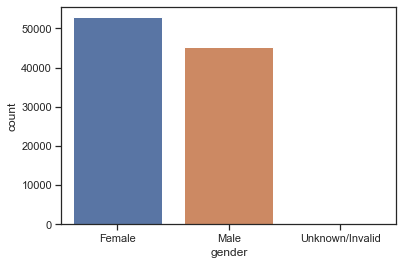

In [20]:
sns.countplot(x="gender", data=df)
plt.show()

**Gender**:
There are only 2 Genders Male and Female in the data 

In [21]:
df=df[(df['gender'] == "Male")| (df['gender'] =="Female")]

 **Readmission**:
 we will classify 0 for no admission and 1 for readmission <30 and >30

In [22]:
df['readmitted'] = df['readmitted'].replace({'NO':0,'>30':1,"<30":1}).astype('category')

## Plots & Inferences

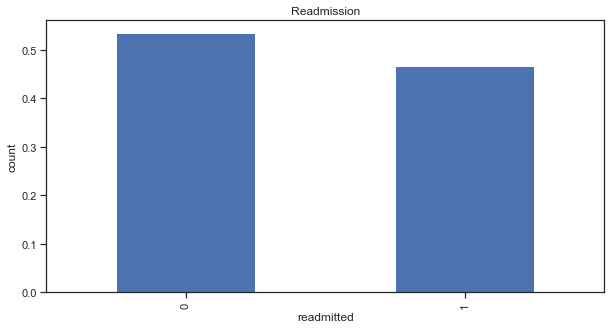

In [23]:

plt.figure(figsize=(10,5))
df['readmitted'].value_counts(normalize=True).plot(kind='bar').set_title("Readmission")
plt.xlabel("readmitted")
plt.ylabel("count")
plt.show()

In [24]:
df['readmitted'].value_counts()

0    52337
1    45715
Name: readmitted, dtype: int64

**Inferences:**

1. The number of patients appearing for readmission in the hospitals is slightly less than the ones not appearing for the same.
2. The target variable is fairly balanced.

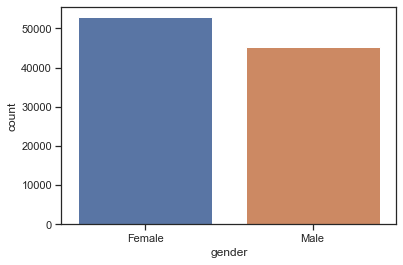

In [25]:
sns.countplot(df['gender'])
plt.show()

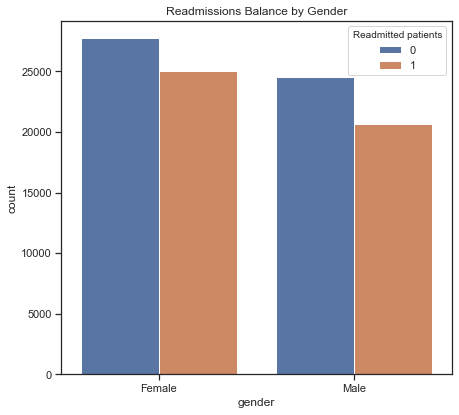

In [26]:
plot = sns.countplot(x = 'gender', hue = 'readmitted', data = df) 
plot.figure.set_size_inches(7, 6.5)
plot.legend(title = 'Readmitted patients', labels = ('0', '1',))
plot.axes.set_title('Readmissions Balance by Gender')
plt.show()

In [27]:
pd.crosstab(df['gender'],df['readmitted'])

readmitted,0,1
gender,,
Female,27771,25062
Male,24566,20653


**Inferences:**

The number of females are more than the number of males.  
Almost 50% of both male and females are getting readmitted.


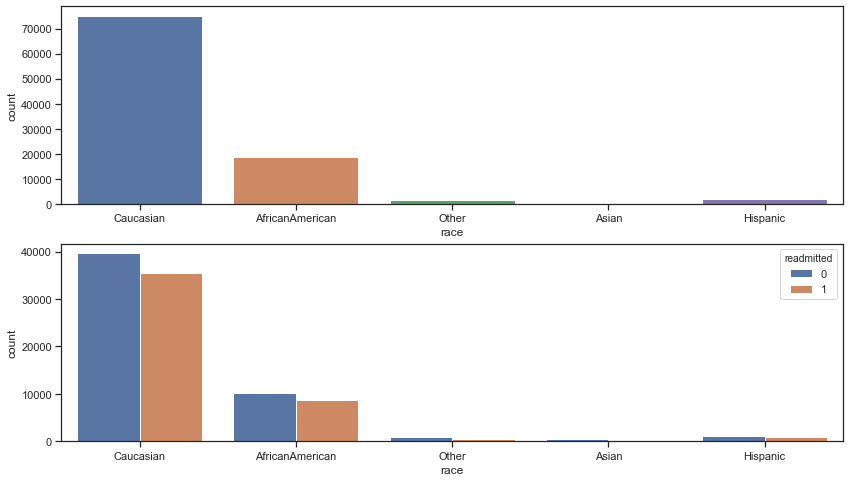

In [28]:
# Count plot of Race by readmission status

f, axes = plt.subplots(2, 1, figsize=(14,8))
axes = axes.flatten()
sns.countplot(df['race'], ax=axes[0])
sns.countplot(df['race'],hue = df['readmitted'], ax=axes[1])
plt.show()

In [29]:
pd.crosstab(df['race'],df['readmitted'])

readmitted,0,1
race,,
AfricanAmerican,10198,8683
Asian,401,224
Caucasian,39693,35386
Hispanic,1144,840
Other,901,582


**Inferences:**

Caucasians are significantly more than any other race.  
Asians are least in number.  


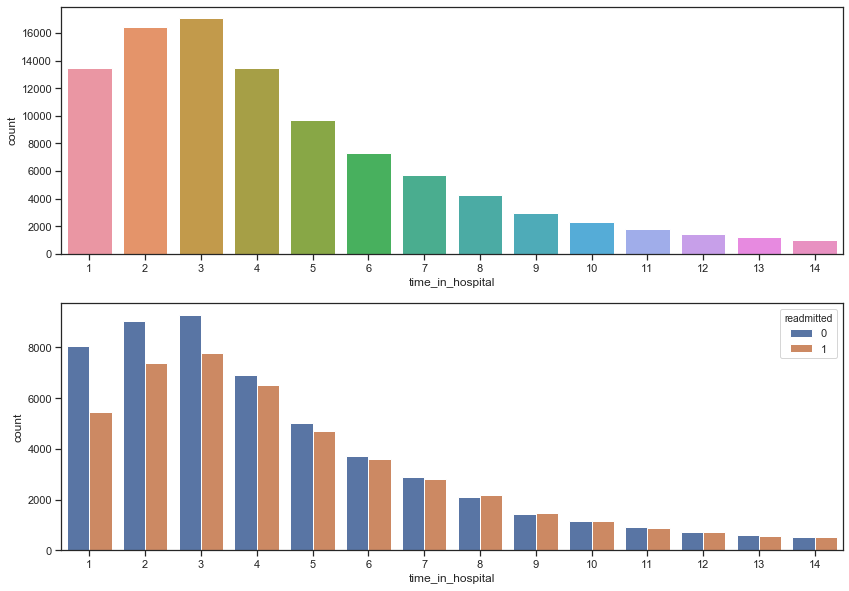

In [30]:
# Count plot of time spent in hospital by readmission status

f, axes = plt.subplots(2, 1, figsize=(14,10))
axes = axes.flatten()
sns.countplot(df['time_in_hospital'],ax=axes[0])
sns.countplot(df['time_in_hospital'],hue = df['readmitted'], ax=axes[1])
plt.show()

In [31]:
pd.crosstab(df['time_in_hospital'],df['readmitted'])

readmitted,0,1
time_in_hospital,,
1,8051,5438
2,9046,7395
3,9281,7768
4,6904,6530
5,5007,4692
6,3702,3618
7,2877,2817
8,2102,2174
9,1449,1479


**Inferences**  
Most patients spend time ranging from 1 to 5 days in the hospital.  
Approximately 50% of the patients gets readmitted under the time of 10 days

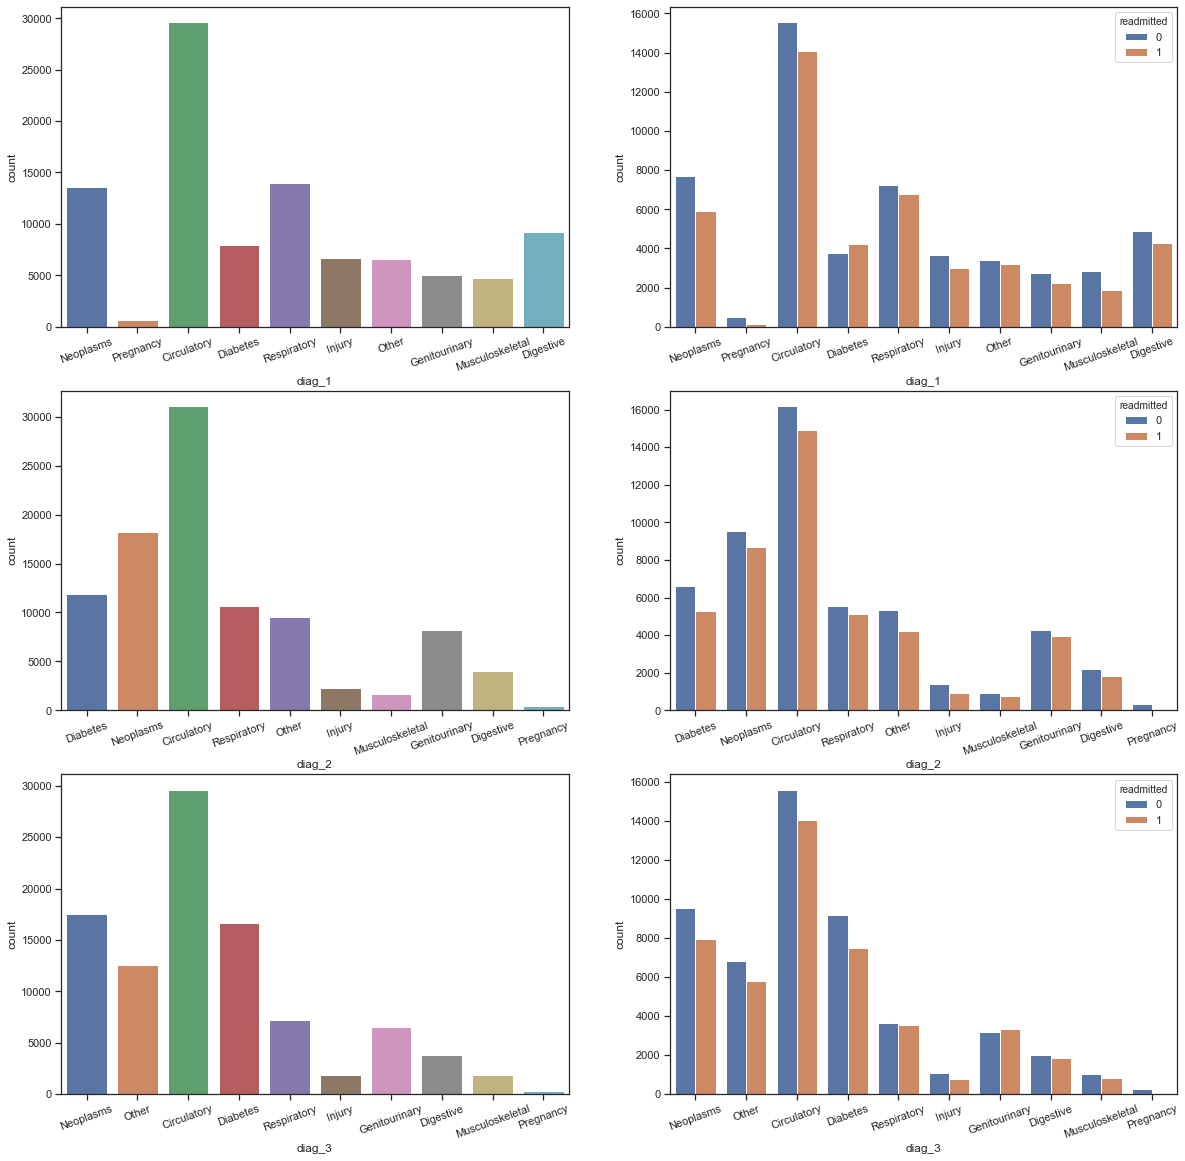

In [32]:
# Count plot of ,diag_1, diag_2 and diag_3 diagnosis by readmission status

fig,ax = plt.subplots(3,2,figsize=(20,20))
ax = ax.flatten()

a=sns.countplot(df['diag_1'], ax=ax[0])
a.tick_params(axis="x",labelrotation=20)
b=sns.countplot(df['diag_1'],hue=df['readmitted'], ax=ax[1])
b.tick_params(axis="x",labelrotation=20)

c=sns.countplot(df['diag_2'], ax=ax[2])
c.tick_params(axis="x",labelrotation=20)
d=sns.countplot(df['diag_2'],hue=df['readmitted'], ax=ax[3])
d.tick_params(axis="x",labelrotation=20)

e=sns.countplot(df['diag_3'], ax=ax[4])
e.tick_params(axis="x",labelrotation=20)
f=sns.countplot(df['diag_3'],hue=df['readmitted'], ax=ax[5])
f.tick_params(axis="x",labelrotation=20)

plt.show()

In [33]:
pd.crosstab(df['diag_1'],df['readmitted'])

readmitted,0,1
diag_1,,
Circulatory,15557,14072
Diabetes,3764,4201
Digestive,4902,4285
Genitourinary,2734,2249
Injury,3681,3022
Musculoskeletal,2852,1887
Neoplasms,7689,5900
Other,3418,3201
Pregnancy,509,136


In [34]:
pd.crosstab(df['diag_2'],df['readmitted'])

readmitted,0,1
diag_2,,
Circulatory,16199,14904
Diabetes,6593,5269
Digestive,2216,1833
Genitourinary,4249,3954
Injury,1397,931
Musculoskeletal,951,759
Neoplasms,9528,8669
Other,5332,4224
Pregnancy,344,63


In [35]:
pd.crosstab(df['diag_3'],df['readmitted'])

readmitted,0,1
diag_3,,
Circulatory,15598,14033
Diabetes,9188,7507
Digestive,1989,1863
Genitourinary,3188,3339
Injury,1104,786
Musculoskeletal,1028,834
Neoplasms,9547,7939
Other,6804,5804
Pregnancy,238,64


**Inferences:**


1) Diabetes has the maximum number of readmissions under diag_1 diagnosis whereas Musculoskeletal has the lowest  
2) Genitourinary and Respiratory has the maximum number of readmissions under diag_2 diagnosis whereas Injury has the lowest   
3) Genitourinary has the maximum number of readmissions under diag_3 diagnosis  whereas Injury has the lowest   

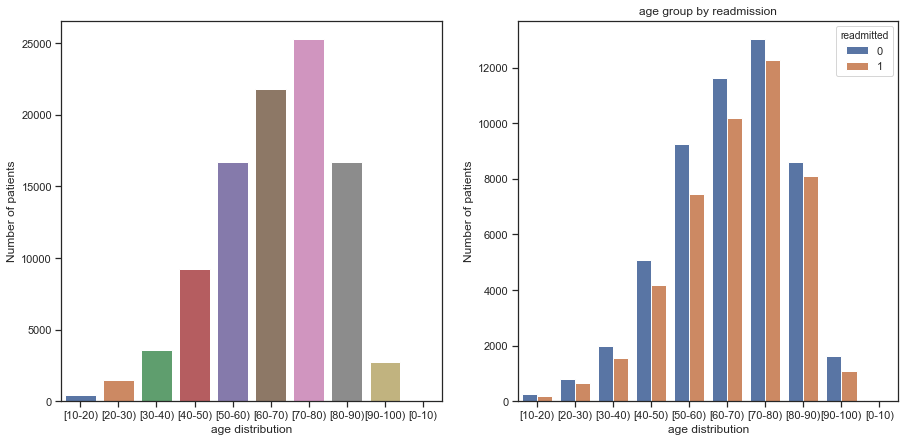

In [36]:
# Count plot of age groups by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,7))
axes = axes.flatten()
sns.countplot(df['age'], ax=axes[0])
axes[0].set_xlabel('age distribution')
axes[0].set_ylabel('Number of patients')
sns.countplot(df['age'],hue = df['readmitted'], ax=axes[1]).set_title('age group by readmission')
axes[1].set_xlabel('age distribution')
axes[1].set_ylabel('Number of patients')
plt.show()

In [37]:
pd.crosstab(df['age'],df['readmitted'])

readmitted,0,1
age,,
[0-10),51,14
[10-20),271,195
[20-30),805,673
[30-40),1998,1550
[40-50),5076,4189
[50-60),9255,7442
[60-70),11614,10195
[70-80),13038,12267
[80-90),8604,8098


**Inferences:**

1) Patients with age ranging from 70-80 years are most in number followed by 60-70 years    
2) Around 50% of patients under the age groups of 70-90 gets readmitted which is the most     
3) Age group of 0-10 has the least with approx 20%

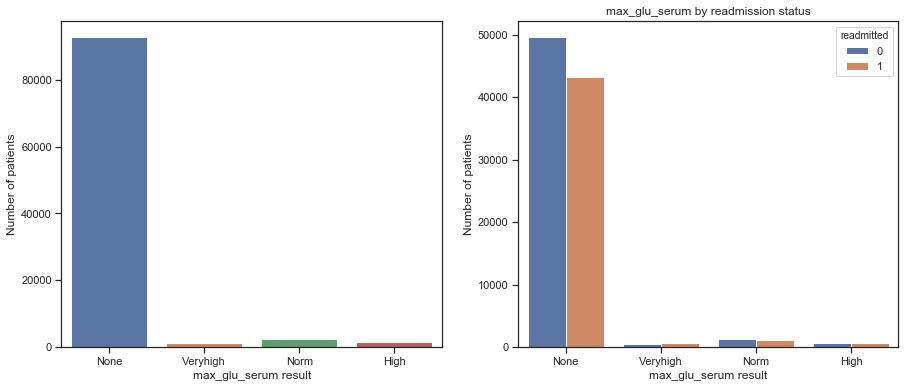

In [38]:
# Count plot for max_glu_serum by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(df['max_glu_serum'], ax=axes[0])
axes[0].set_xlabel('max_glu_serum result')
axes[0].set_ylabel('Number of patients')
sns.countplot(df['max_glu_serum'],hue = df['readmitted'], ax=axes[1]).set_title('max_glu_serum by readmission status')
axes[1].set_xlabel('max_glu_serum result')
axes[1].set_ylabel('Number of patients')
plt.show()

In [39]:
pd.crosstab(df['max_glu_serum'],df['readmitted'])

readmitted,0,1
max_glu_serum,,
High,746,703
None,49676,43168
Norm,1376,1156
Veryhigh,539,688


**Inferences:**

1) Approximately 95% of patients are not taking max_glu_serum test  
2) Approximately 56% of patients whose results are very high were readmitted (highest)  
3) Approximately 45% of patients whose results are Normal were readmitted (lowest).

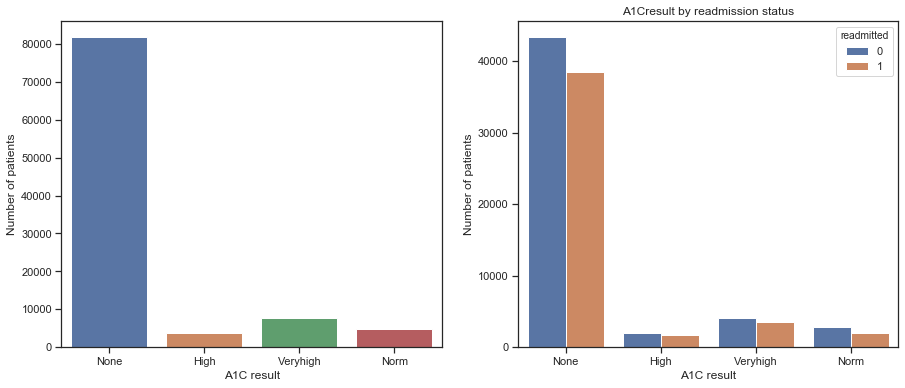

In [40]:
# Count plot for A1Cresult by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(df['A1Cresult'], ax=axes[0])
axes[0].set_xlabel('A1C result')
axes[0].set_ylabel('Number of patients')
sns.countplot(df['A1Cresult'],hue = df['readmitted'], ax=axes[1]).set_title('A1Cresult by readmission status')
axes[1].set_xlabel('A1C result')
axes[1].set_ylabel('Number of patients')
plt.show()

In [41]:
pd.crosstab(df['A1Cresult'],df['readmitted'])

readmitted,0,1
A1Cresult,,
High,2058,1650
None,43405,38454
Norm,2814,2040
Veryhigh,4060,3571


**Inferences:**

1) Number of patients those who did not take A1C test are higher.  
2) Approximately 47% of patients are getting readmitted who did not take the test   
3) People whose results were very high in number- Approximately 44% (highest)  
4) People whose results were normal are lowest in number (42.03%)

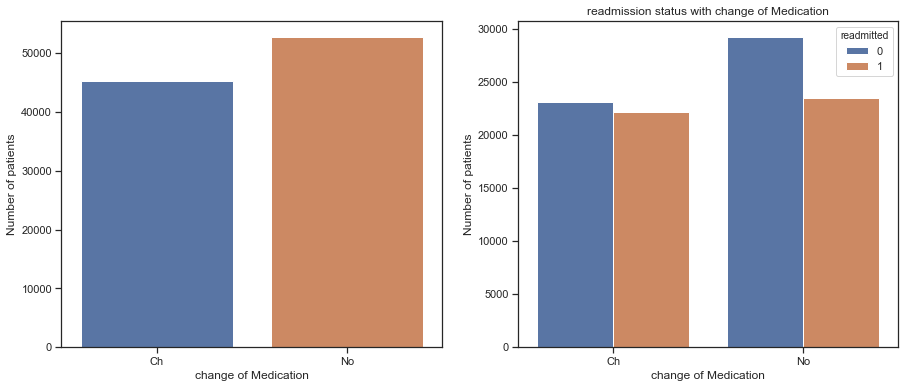

In [42]:
# Count plot for medication changes by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,6))
axes = axes.flatten()
sns.countplot(df['change'], ax=axes[0])
axes[0].set_xlabel('change of Medication')
axes[0].set_ylabel('Number of patients')
sns.countplot(df['change'],hue = df['readmitted'], ax=axes[1]).set_title('readmission status with change of Medication')
axes[1].set_xlabel('change of Medication')
axes[1].set_ylabel('Number of patients')
plt.show()

In [43]:
pd.crosstab(df['change'],df['readmitted'])

readmitted,0,1
change,,
Ch,23068,22210
No,29269,23505


**Inferences:**

1) More number of patients did not prefer a change of medication.   
2) Patients who had a change of medication had a higher rate of readmission - 49%  

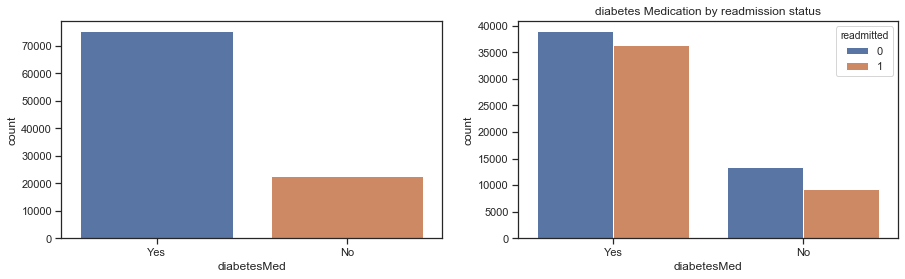

In [44]:
# Count plot of diabetes medication by readmission status

f, axes = plt.subplots(1, 2, figsize=(15,4))
axes = axes.flatten()
sns.countplot(df['diabetesMed'], ax=axes[0])
axes[0].set_xlabel('diabetesMed')

sns.countplot(df['diabetesMed'],hue = df['readmitted'], ax=axes[1]).set_title('diabetes Medication by readmission status')
axes[1].set_xlabel('diabetesMed')

plt.show()

In [45]:
pd.crosstab(df['diabetesMed'],df['readmitted'])

readmitted,0,1
diabetesMed,,
No,13402,9300
Yes,38935,36415


**Inferences**:

1) Most of the patients were prescribed with diabetes related medication.  
2) Patients who are prescribed with diabetes related medication are having a higher rate of readmission - 48%  

# ID-Mapping

In [46]:
# Mapping discharge disposition ids with their respective descriptions

df['discharge_disposition'] = df['discharge_disposition_id'].replace(
{1:'discharged to home',2:'transferred to facility',3:'transferred to facility',4:'transferred to facility',
5:'transferred to facility',6:'discharged to home',7:'discharged to home',8:'discharged to home',
9:'transferred to facility',10:'transferred to hospital',11:'death',12:'transferred to facility',
13:'discharged to home',14:'transferred to hospital',15:'transferred to facility',16:'transferred to hospital',
17:'transferred to facility',18:'Otherwise',19:'death',20:'death',21:'death',22:'transferred to facility',
23:'transferred to hospital',24:'transferred to facility',25:'Otherwise',26:'Otherwise',27:'transferred to facility',
28:'transferred to facility',29:'transferred to hospital',30:'transferred to facility'})

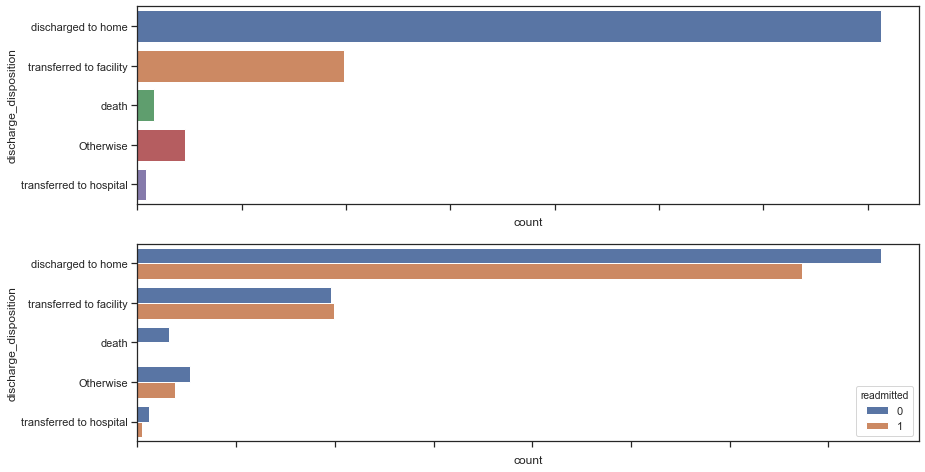

In [47]:
# Count plot of discharge disposition by readmission status

fig,ax = plt.subplots(2,1,figsize=(14,8)) 
ax = ax.flatten() 
a=sns.countplot(y=df['discharge_disposition'],ax = ax[0]) 
a.set_xticklabels(a.get_xticklabels(), rotation=90)
b=sns.countplot(y=df['discharge_disposition'],hue = df['readmitted'],ax = ax[1])
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

In [48]:
pd.crosstab(df['discharge_disposition'],df['readmitted'])

readmitted,0,1
discharge_disposition,,
Otherwise,2641,1924
death,1616,0
discharged to home,37685,33644
transferred to facility,9822,9935
transferred to hospital,573,212


**Inferences:**

1) Most of the patients are discharged to their homes.  
2) 50% of patients who were transferred to another facility got readmitted, having the highest rate.  
3) Patients who were transferred to other hospitals has the least rate of readmission - 27%  

In [49]:
# Mapping admission source ids with their respective descriptions

df['admission_source'] = df['admission_source_id'].replace({1:'Through Reference',
                  2:'Through Reference',
                  3:'Through Reference',4:'Transfer from a Facility/Hospital',
                  5:'Transfer from a Facility/Hospital',
                  6:'Transfer from a Facility/Hospital',
                  7:'Emergency room',8:'Otherwise',
                  9:'Not Available',10:'Transfer from a Facility/Hospital',
                  11:'Otherwise',13:'Otherwise',14:'Otherwise',15:'Not Available',
                  17:'Not Available',20:'Not Available',21:'Not Available',
                  22:'Transfer from a Facility/Hospital',
                  23:'Otherwise',24:'Otherwise',25:'Transfer from a Facility/Hospital',
                  26:'Transfer from a Facility/Hospital'})

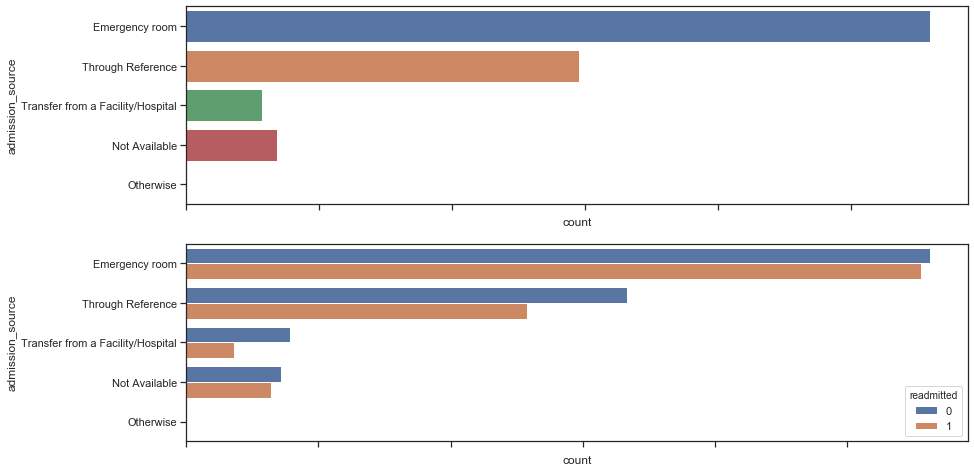

In [50]:
# Count plot of admission sources by readmission status

fig,ax = plt.subplots(2,1,figsize=(14,8)) 
ax = ax.flatten() 
a=sns.countplot(y=df['admission_source'],ax = ax[0]) 
a.set_xticklabels(a.get_xticklabels(), rotation=90)
b=sns.countplot(y=df['admission_source'],hue = df['readmitted'],ax = ax[1])
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

In [51]:
pd.crosstab(df['admission_source'],df['readmitted'])

readmitted,0,1
admission_source,,
Emergency room,28153,27798
Not Available,3600,3211
Otherwise,14,6
Through Reference,16664,12901
Transfer from a Facility/Hospital,3906,1799


**Inferences:**

1) Patients having an admission source of emergency rooms are most in number followed by references.  
2) Patients admitted from emergency rooms are having the highest rate of readmission (49%).  
3) Patients transferred from other undefined sources are having the lowest rate of readmission (30%).

In [52]:
# Mapping admission type ids with their respective descriptions

df['admission_type'] = df['admission_type_id'].replace({1:'Emergency',2:'Emergency',
                                                    3:'Elective', 4:'Newborn',
                                                    5:'Not Available',6:'Not Available',
                                                    7:'Trauma Center',8:'Not Available'})

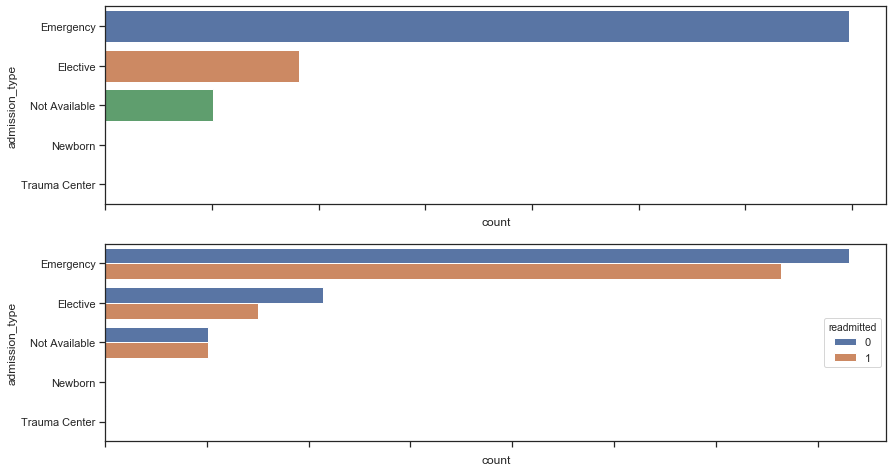

In [53]:
# Count plot of admission type by readmission status

fig,ax = plt.subplots(2,1,figsize=(14,8)) 
ax = ax.flatten() 
a=sns.countplot(y=df['admission_type'],ax = ax[0]) 
a.set_xticklabels(a.get_xticklabels(), rotation=90)
b=sns.countplot(y=df['admission_type'],hue = df['readmitted'],ax = ax[1])
b.set_xticklabels(b.get_xticklabels(), rotation=90)
plt.show()

In [54]:
pd.crosstab(df['admission_type'],df['readmitted'])

readmitted,0,1
admission_type,,
Elective,10689,7504
Emergency,36545,33176
Newborn,7,3
Not Available,5076,5032
Trauma Center,20,0


**Inferences:**

1) Admissions of emergency are most in number followed by elective types.    
2) Admissions of Not Available are having the highest rate of readmissions - 49%  
3) Trauma Center type admissions are having the lowest rate - 0%  

## Feature Engineering

We need to do the following steps in our project:     
     
1. Converting object type variables to numerical.     
2. Encoding the categorical variables.
3. Grouping similar data.  

**Age**: 

We will convert age into 3 groups:     

* 0 - 30 as 1
* 30 - 60 as 2
* Greater than 60 as 3

In [55]:
def age_bin(age):
    if age in ['[0-10)','[10-20)','[20-30)']:
        return 1
    elif age in ['[30-40)','[40-50)','[50-60)']:
        return 2
    else:
        return 3

#Applying function
df['age_cat'] = df['age'].apply(age_bin)

#Dropping the age column
df.drop('age',axis=1,inplace=True)

In [56]:
df.head()

,encounter_id,patient_nbr,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,discharge_disposition,admission_source,admission_type,age_cat
0,149190,55629189,Caucasian,Female,1,1,7,3,59,0,18,0,0,0,Neoplasms,Diabetes,Neoplasms,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,Ch,Yes,1,discharged to home,Emergency room,Emergency,1
1,64410,86047875,AfricanAmerican,Female,1,1,7,2,11,5,13,2,0,1,Pregnancy,Diabetes,Other,6,None,None,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No,Yes,0,discharged to home,Emergency room,Emergency,1
2,500364,82442376,Caucasian,Male,1,1,7,2,44,1,16,0,0,0,Neoplasms,Diabetes,Circulatory,7,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,Ch,Yes,0,discharged to home,Emergency room,Emergency,2
3,16680,42519267,Caucasian,Male,1,1,7,1,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,Ch,Yes,0,discharged to home,Emergency room,Emergency,2
4,35754,82637451,Caucasian,Male,2,1,2,3,31,6,16,0,0,0,Circulatory,Circulatory,Diabetes,9,None,None,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,No,Yes,1,discharged to home,Through Reference,Emergency,2


In [57]:
df['race'].value_counts()

Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: race, dtype: int64

**Race**:

We will merge "Hispanic" and "Asian" races to "Other" race simce they are very less in number
    

In [58]:
# dropping columns related to IDs

df.drop(['encounter_id','patient_nbr',"discharge_disposition_id","admission_source_id","admission_type_id"],
          axis=1,inplace=True)

## Label Encoding

## Converting Categorical data to Numerical Data 

In [59]:
labelencoder = LabelEncoder()

cols = ['race', 'diag_1', 'diag_2', 'diag_3',"gender","max_glu_serum",'A1Cresult','change',
        "discharge_disposition","admission_source","admission_type","readmitted","diabetesMed"]

for col in cols:
    df[col] = labelencoder.fit_transform(df[col])

In [60]:
df.head()

,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,discharge_disposition,admission_source,admission_type,age_cat
0,2,0,3,59,0,18,0,0,0,6,1,6,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,1,2,0,1,1
1,0,0,2,11,5,13,2,0,1,8,1,7,6,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,1,1
2,2,1,2,44,1,16,0,0,0,6,1,0,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,2,0,1,2
3,2,1,1,51,0,8,0,0,0,6,6,1,5,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,2,0,1,2
4,2,1,3,31,6,16,0,0,0,0,0,1,9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,1,2,3,1,2


In [61]:
df.shape

(98052, 45)

# Basic Model
**Without any feature selection**

In [62]:
from sklearn.model_selection import train_test_split
X=df.drop(["readmitted"],axis=1)
y=df["readmitted"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=0)
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
print('Training score =', model.score(x_train, y_train))
print('Test score =', model.score(x_test, y_test))

Training score = 0.6177224779998834
Test score = 0.6143255371226544


# Checking Multi collineatiry

In [63]:
X = df.drop('readmitted', axis=1)
y= df['readmitted']

# Checking the VIF values

Xc=sm.add_constant(X)

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(Xc.values,i) for i in range(Xc.shape[1])]
vif['features']=Xc.columns
vif.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
vif,88.1756,1.03833,1.01952,1.40397,1.25421,1.34023,1.66358,1.03512,1.09765,1.12389,1.09117,1.05463,1.03545,1.2061,1.06083,1.06899,1.27692,1.02734,1.01193,1.00423,1.09285,1.00027,1.21971,1.23031,1.00102,1.09953,1.08567,1.00513,1.00126,1.00039,1.00177,NaN,NaN,2.00573,1.01561,1.00153,1.00021,NaN,1.00029,1.96218,1.9847,1.06101,1.20326,1.14052,1.13288
features,const,race,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,discharge_disposition,admission_source,admission_type,age_cat


 Everything has VIF value close to 1 so, multi collinearity is not present

## Feature selection
Choosing the most relevant features in your data   
**We will perform statistical tests to select the required features**

In [64]:
# Performing ANOVA test
num = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','number_diagnoses']
columns = []
p = []
for col in num: 

    import scipy.stats as stats
    statistic,p_value = stats.f_oneway(df[df['readmitted']==0][col], df[df['readmitted']==1][col])
    columns.append(col)
    p.append(p_value)
    
d1 = pd.DataFrame({'Feature':columns,'p_value':p})
d1

,Feature,p_value
0,time_in_hospital,1.189234e-52
1,num_lab_procedures,1.258547e-31
2,num_procedures,7.672169e-47
3,num_medications,1.868043e-41
4,number_outpatient,2.598108e-138
5,number_emergency,1.120111e-223
6,number_inpatient,0.000000e+00
7,number_diagnoses,1.147244e-235


In [65]:
# Applying Chi2 test to find out the p_values

columns = []
p_value = []
for col in ['race', 'gender','diag_1', 'diag_2', 'diag_3',
       'max_glu_serum', 'metformin', 'repaglinide',
       'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide',
       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
       'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
       'glipizide-metformin', 'glimepiride-pioglitazone',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed',
       'age_cat', 'discharge_disposition', 'admission_source',
       'admission_type', 'A1Cresult','change','readmitted']:
    a = stats.chi2_contingency(pd.crosstab(df['readmitted'], df[col]))
    columns.append(col)
    p_value.append(a[1])
    
d2 = pd.DataFrame({'Feature':columns,'p_value':p_value})
d2

,Feature,p_value
0,race,5.328096e-18
1,gender,3.588814e-08
2,diag_1,4.042289e-97
3,diag_2,1.107336e-58
4,diag_3,1.423555e-41
5,max_glu_serum,2.506782e-10
6,metformin,2.666290e-17
7,repaglinide,1.845921e-10
8,nateglinide,5.837905e-01
9,chlorpropamide,2.180909e-01


In [66]:
table = pd.concat([d1,d2])

In [67]:
# Selecting significant features from the list (having p-value<0.05)
new_features = list(table[table['p_value']<0.05]['Feature'])
new_df = df.loc[:,new_features]
data_set=new_df.copy()
print(len(new_features))
new_features


29


['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses',
 'race',
 'gender',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'metformin',
 'repaglinide',
 'glipizide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'insulin',
 'diabetesMed',
 'age_cat',
 'discharge_disposition',
 'admission_source',
 'admission_type',
 'A1Cresult',
 'change',
 'readmitted']

 we selected 29 features from 50 features by doing Feature selection out of which 1 is target variable
 

# Scaling the features
we need to scale the data because features are in different units, and we want to normalize the features so the units do not affect the algorithm

In [68]:

X = new_df.drop('readmitted',axis=1)
y= new_df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Creating the scaler object with a range of (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [69]:

train = []
test = []
def model_fit(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_train_pred=algo.predict(X_train)
  y_train_prob=algo.predict_proba(X_train)[:,1]
  print("auc score of train data",roc_auc_score(y_train,y_train_prob))
  train.append(roc_auc_score(y_train,y_train_prob))

  y_test_pred=algo.predict(X_test) #ML
  y_test_prob=algo.predict_proba(X_test)[:,1] #  in statistics
  print("auc score of test data",roc_auc_score(y_test,y_test_prob))
  test.append(roc_auc_score(y_test,y_test_prob))
  print("confusion_matrix",confusion_matrix(y_test,y_test_pred))
  print("classification_report")
  print(classification_report(y_test,y_test_pred))
  fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)

  roc_auc = auc(fpr, tpr)
  print("roc_auc",roc_auc)
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC_AUC CURVE")

### Logistic Regression

auc score of train data 0.6559843648906079
auc score of test data 0.6557083093401673
confusion_matrix [[12272  3298]
 [ 8076  5770]]
classification_report
              precision    recall  f1-score   support

           0       0.60      0.79      0.68     15570
           1       0.64      0.42      0.50     13846

    accuracy                           0.61     29416
   macro avg       0.62      0.60      0.59     29416
weighted avg       0.62      0.61      0.60     29416

roc_auc 0.6557083093401673


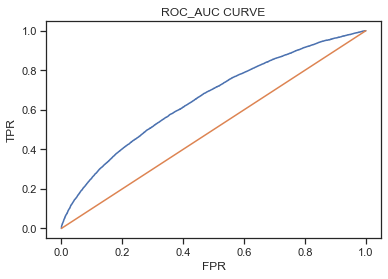

In [70]:
lr = LogisticRegression()
model_fit(lr,X_train_s,y_train,X_test_s,y_test)

### Naive Bayes

auc score of train data 0.6412810348400427
auc score of test data 0.6417934999463314
confusion_matrix [[13803  1767]
 [10418  3428]]
classification_report
              precision    recall  f1-score   support

           0       0.57      0.89      0.69     15570
           1       0.66      0.25      0.36     13846

    accuracy                           0.59     29416
   macro avg       0.61      0.57      0.53     29416
weighted avg       0.61      0.59      0.54     29416

roc_auc 0.6417934999463314


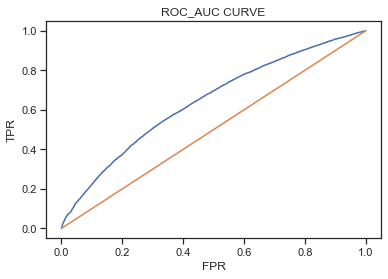

In [71]:
nb = GaussianNB()
model_fit(nb,X_train,y_train,X_test,y_test)

### Decision Tree

auc score of train data 1.0
auc score of test data 0.5554214675032106
confusion_matrix [[9106 6464]
 [6563 7283]]
classification_report
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     15570
           1       0.53      0.53      0.53     13846

    accuracy                           0.56     29416
   macro avg       0.56      0.56      0.56     29416
weighted avg       0.56      0.56      0.56     29416

roc_auc 0.5554214675032106


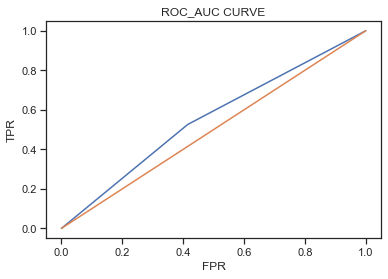

In [72]:
dt = DecisionTreeClassifier()
model_fit(dt,X_train,y_train,X_test,y_test)

### Random Forest

auc score of train data 1.0
auc score of test data 0.6761687652163523
confusion_matrix [[11210  4360]
 [ 6661  7185]]
classification_report
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     15570
           1       0.62      0.52      0.57     13846

    accuracy                           0.63     29416
   macro avg       0.62      0.62      0.62     29416
weighted avg       0.62      0.63      0.62     29416

roc_auc 0.6761687652163523


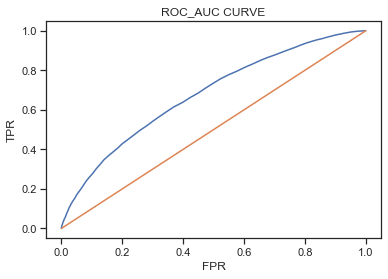

In [73]:
rf = RandomForestClassifier()
model_fit(rf,X_train,y_train,X_test,y_test)

In [74]:
# This looks highest until now

In [75]:
# Lets try out with Ensemble methods

#### Bagging with DT

auc score of train data 0.9988727579799285
auc score of test data 0.6316969298302986
confusion_matrix [[11276  4294]
 [ 7590  6256]]
classification_report
              precision    recall  f1-score   support

           0       0.60      0.72      0.65     15570
           1       0.59      0.45      0.51     13846

    accuracy                           0.60     29416
   macro avg       0.60      0.59      0.58     29416
weighted avg       0.60      0.60      0.59     29416

roc_auc 0.6316969298302986


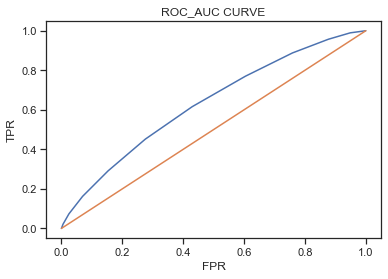

In [76]:
dt_bg=BaggingClassifier()
dt_bg.fit(X_train,y_train)
model_fit(dt_bg,X_train,y_train,X_test,y_test)

#### Bagging with NB

auc score of train data 0.6417749017917368
auc score of test data 0.6421747906668742
confusion_matrix [[13795  1775]
 [10410  3436]]
classification_report
              precision    recall  f1-score   support

           0       0.57      0.89      0.69     15570
           1       0.66      0.25      0.36     13846

    accuracy                           0.59     29416
   macro avg       0.61      0.57      0.53     29416
weighted avg       0.61      0.59      0.54     29416

roc_auc 0.6421747906668742


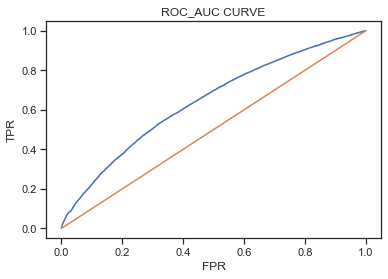

In [77]:
nb = GaussianNB()
nb_bg=BaggingClassifier(base_estimator=nb)
nb_bg.fit(X_train,y_train)
model_fit(nb_bg,X_train,y_train,X_test,y_test)

#### Bagging with RF

auc score of train data 0.9988574860846723
auc score of test data 0.6845875833359542
confusion_matrix [[11383  4187]
 [ 6612  7234]]
classification_report
              precision    recall  f1-score   support

           0       0.63      0.73      0.68     15570
           1       0.63      0.52      0.57     13846

    accuracy                           0.63     29416
   macro avg       0.63      0.63      0.63     29416
weighted avg       0.63      0.63      0.63     29416

roc_auc 0.6845875833359542


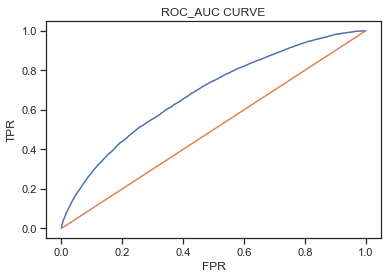

In [78]:
rf = RandomForestClassifier()
rf_bg=BaggingClassifier(base_estimator=rf)
rf_bg.fit(X_train,y_train)
model_fit(rf_bg,X_train,y_train,X_test,y_test)

In [79]:
# RF looks highest 

In [80]:
# Lets try out some boosting methods

# Boosting

#### Ada Boost (Linear Regression)

auc score of train data 0.594463184765525
auc score of test data 0.5908262935598307
confusion_matrix [[11616  3954]
 [ 8839  5007]]
classification_report
              precision    recall  f1-score   support

           0       0.57      0.75      0.64     15570
           1       0.56      0.36      0.44     13846

    accuracy                           0.57     29416
   macro avg       0.56      0.55      0.54     29416
weighted avg       0.56      0.57      0.55     29416

roc_auc 0.5908262935598307


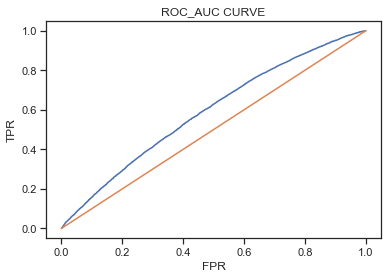

In [81]:
lr=LogisticRegression()
lr_bt=AdaBoostClassifier(base_estimator=lr)
model_fit(lr_bt,X_train_s,y_train,X_test_s,y_test)

#### AdaBoost Classifier (Decision Tree)

auc score of train data 0.67873679280298
auc score of test data 0.6785579650306969
confusion_matrix [[11925  3645]
 [ 7230  6616]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.77      0.69     15570
           1       0.64      0.48      0.55     13846

    accuracy                           0.63     29416
   macro avg       0.63      0.62      0.62     29416
weighted avg       0.63      0.63      0.62     29416

roc_auc 0.6785579650306969


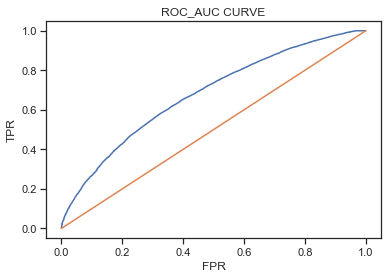

In [82]:
dt_bt=AdaBoostClassifier()
model_fit(dt_bt,X_train,y_train,X_test,y_test)

#### AdaBoost Classifier (Naive-Bayes)

auc score of train data 0.5229603491186405
auc score of test data 0.5227872618623187
confusion_matrix [[ 4600 10970]
 [ 3709 10137]]
classification_report
              precision    recall  f1-score   support

           0       0.55      0.30      0.39     15570
           1       0.48      0.73      0.58     13846

    accuracy                           0.50     29416
   macro avg       0.52      0.51      0.48     29416
weighted avg       0.52      0.50      0.48     29416

roc_auc 0.5227872618623187


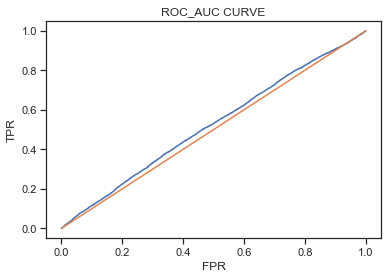

In [83]:
nb = GaussianNB()
nb_bt=AdaBoostClassifier(base_estimator=nb)
model_fit(nb_bt,X_train,y_train,X_test,y_test)

#### AdaBoost Classifier (Random Forest)

auc score of train data 1.0
auc score of test data 0.6753844403309326
confusion_matrix [[11242  4328]
 [ 6622  7224]]
classification_report
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     15570
           1       0.63      0.52      0.57     13846

    accuracy                           0.63     29416
   macro avg       0.63      0.62      0.62     29416
weighted avg       0.63      0.63      0.62     29416

roc_auc 0.6753844403309326


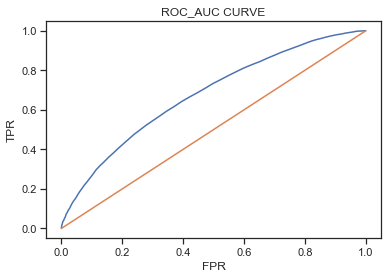

In [84]:
rf = RandomForestClassifier()
rf_bt=AdaBoostClassifier(base_estimator=rf)
model_fit(rf_bt,X_train,y_train,X_test,y_test)

#### Gradient Boost Classifier

auc score of train data 0.6918676740855221
auc score of test data 0.685489503726235
confusion_matrix [[11795  3775]
 [ 7029  6817]]
classification_report
              precision    recall  f1-score   support

           0       0.63      0.76      0.69     15570
           1       0.64      0.49      0.56     13846

    accuracy                           0.63     29416
   macro avg       0.64      0.62      0.62     29416
weighted avg       0.63      0.63      0.63     29416

roc_auc 0.685489503726235


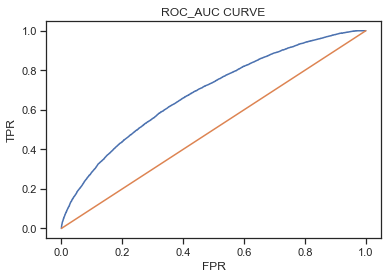

In [85]:
gb=GradientBoostingClassifier()
model_fit(gb,X_train,y_train,X_test,y_test)

In [86]:
# Ada boost looks highest until now

Now lets optimize our models with tuning Hyperparameters  
 We can choose the best hyperparameters for a model through random search and cross validation.

### Hyper Parameter tuning for Decision Tree Classifier

In [87]:
dt = DecisionTreeClassifier()
parameters = {'max_depth': range(1, 24),
    'min_samples_leaf': range(10, 150),
    'min_samples_split': range(10, 150),
    'criterion': ["entropy", "gini"]}
RS_dt = RandomizedSearchCV(dt, parameters, 
                    cv=4, scoring="accuracy",random_state=0)
RS_dt.fit(X_train,y_train)
RS_dt.best_params_

{'min_samples_split': 145,
 'min_samples_leaf': 117,
 'max_depth': 8,
 'criterion': 'entropy'}

auc score of train data 0.6785893528080932
auc score of test data 0.6683411113402581
confusion_matrix [[11488  4082]
 [ 6937  6909]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.74      0.68     15570
           1       0.63      0.50      0.56     13846

    accuracy                           0.63     29416
   macro avg       0.63      0.62      0.62     29416
weighted avg       0.63      0.63      0.62     29416

roc_auc 0.6683411113402581


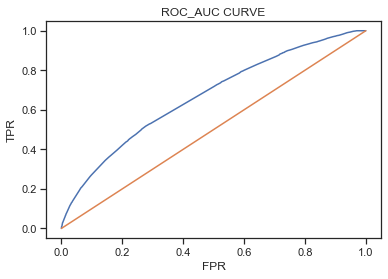

In [88]:
dt = DecisionTreeClassifier(**RS_dt.best_params_)
model_fit(dt,X_train,y_train,X_test,y_test)

### Hyper Parameter tuning for Random Forest Classifier

In [89]:
rf = RandomForestClassifier()
parameters={'max_depth':[2,4,6,8,10],'min_samples_leaf':range(1,50),
            'min_samples_split':range(10,100),'n_estimators':[1,2,3,4,5,6]}
RS_rf= RandomizedSearchCV(rf, param_distributions=parameters, cv=3,random_state=0)
RS_rf.fit(X_train,y_train)
RS_rf.best_params_

{'n_estimators': 6,
 'min_samples_split': 99,
 'min_samples_leaf': 31,
 'max_depth': 10}

auc score of train data 0.6932505203259615
auc score of test data 0.6756260024597576
confusion_matrix [[11848  3722]
 [ 7211  6635]]
classification_report
              precision    recall  f1-score   support

           0       0.62      0.76      0.68     15570
           1       0.64      0.48      0.55     13846

    accuracy                           0.63     29416
   macro avg       0.63      0.62      0.62     29416
weighted avg       0.63      0.63      0.62     29416

roc_auc 0.6756260024597576


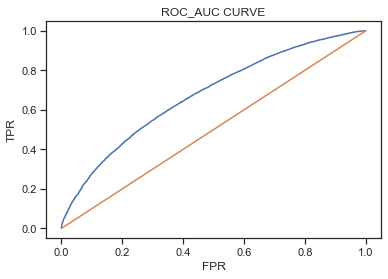

In [90]:
rf = RandomForestClassifier(**RS_rf.best_params_,random_state=0)
model_fit(rf,X_train,y_train,X_test,y_test)

### Hyperparamter tuning for Graident boost

Accuracy of the GBM on test set: 0.636
              precision    recall  f1-score   support

           0       0.63      0.76      0.69     15570
           1       0.65      0.50      0.56     13846

    accuracy                           0.64     29416
   macro avg       0.64      0.63      0.63     29416
weighted avg       0.64      0.64      0.63     29416



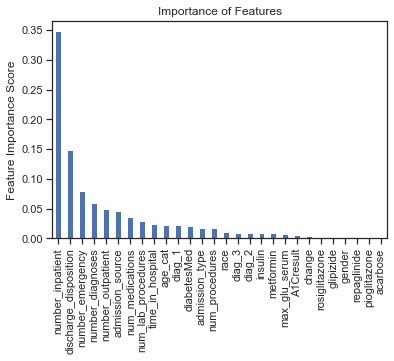

In [91]:
new=GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)
new.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

In [92]:
# No.of inpatients,discharge_disposition and No.of emergency are important features

In [93]:
score = pd.DataFrame({'model':['Logistic Regression', 'Naive-Bayes', 'Decision Tree Classifier', 'Random Forest Classifier',
                               'DecisionTree (bagged)', 'Naive-Bayes (bagged)','Random-Forest(bagged)',
                               'Decision Tree (boosted)', 'Logistic Regression (boosted)', 'Naive-Bayes (boosted)',
                               'Random Forest (boosted)', 'Gradient Boost Classifier', 'Decision Tree (tunned)',
                               'Random Forest (tunned)'],
                     'train_accuracy':train,'test_accracy':test})
score

,model,train_accuracy,test_accracy
0,Logistic Regression,0.655984,0.655708
1,Naive-Bayes,0.641281,0.641793
2,Decision Tree Classifier,1.000000,0.555421
3,Random Forest Classifier,1.000000,0.676169
4,DecisionTree (bagged),0.998873,0.631697
5,Naive-Bayes (bagged),0.641775,0.642175
6,Random-Forest(bagged),0.998857,0.684588
7,Decision Tree (boosted),0.594463,0.590826
8,Logistic Regression (boosted),0.678737,0.678558
9,Naive-Bayes (boosted),0.522960,0.522787


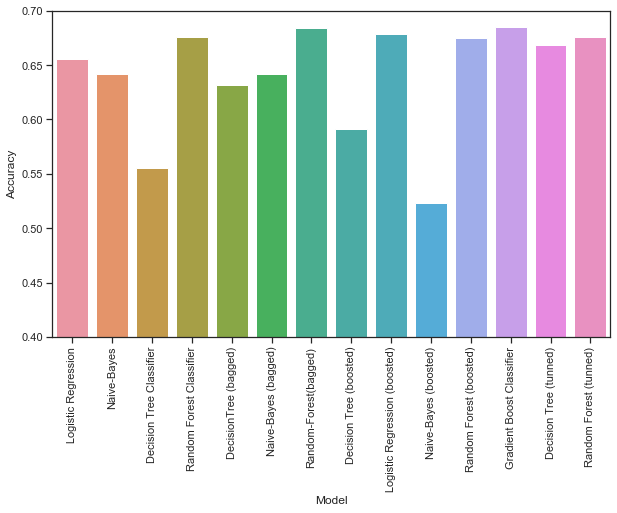

In [94]:
plt.figure(figsize=(10,6))
sns.barplot(x="model", y="test_accracy", data=score)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0.4,0.7])
plt.xticks(rotation=90)
plt.show()

#### GB Parameter tunning source code
https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/

In [95]:
# Gradient boost(68.5) and Rf-bagged (68.4) are with highest test accuracy

In [96]:
import pickle

pickle_out = open("cleaned_data.pickle","wb")
pickle.dump(data_set, pickle_out)
pickle_out.close()

In [97]:
pickle_in = open("cleaned_data.pickle","rb")
a = pickle.load(pickle_in)
a

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race,gender,diag_1,diag_2,diag_3,max_glu_serum,metformin,repaglinide,glipizide,pioglitazone,rosiglitazone,acarbose,insulin,diabetesMed,age_cat,discharge_disposition,admission_source,admission_type,A1Cresult,change,readmitted
0,3,59,0,18,0,0,0,9,2,0,6,1,6,1,0,0,0,0,0,0,3,1,1,2,0,1,1,0,1
1,2,11,5,13,2,0,1,6,0,0,8,1,7,1,0,0,2,0,0,0,0,1,1,2,0,1,1,1,0
2,2,44,1,16,0,0,0,7,2,1,6,1,0,1,0,0,0,0,0,0,3,1,2,2,0,1,1,0,0
3,1,51,0,8,0,0,0,5,2,1,6,6,1,1,0,0,2,0,0,0,2,1,2,2,0,1,1,0,0
4,3,31,6,16,0,0,0,9,2,1,0,0,1,1,0,0,0,0,0,0,2,1,2,2,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,3,51,0,16,0,0,0,9,0,1,1,7,0,1,2,0,0,0,0,0,1,1,3,3,0,1,3,0,1
98049,5,33,3,18,0,0,1,9,0,0,2,6,2,1,0,0,0,0,0,0,2,1,3,3,4,1,1,1,0
98050,1,53,0,9,1,0,0,13,2,1,6,3,7,1,2,0,0,0,0,0,1,1,3,2,0,1,1,0,0
98051,10,45,2,21,0,0,1,9,2,0,4,7,4,1,0,0,2,2,0,0,3,1,3,3,0,1,1,0,0
